## **DEPARTMENT OF COMPUTER SCIENCE AND TECHNOLOGY**

### **Artificial Intelligence Lab (CS4271)**
### **Name: SAGAR BASAK**
### **Enrollment No: 2021CSB008**
### **Assignment: 2**

## **Question 1**

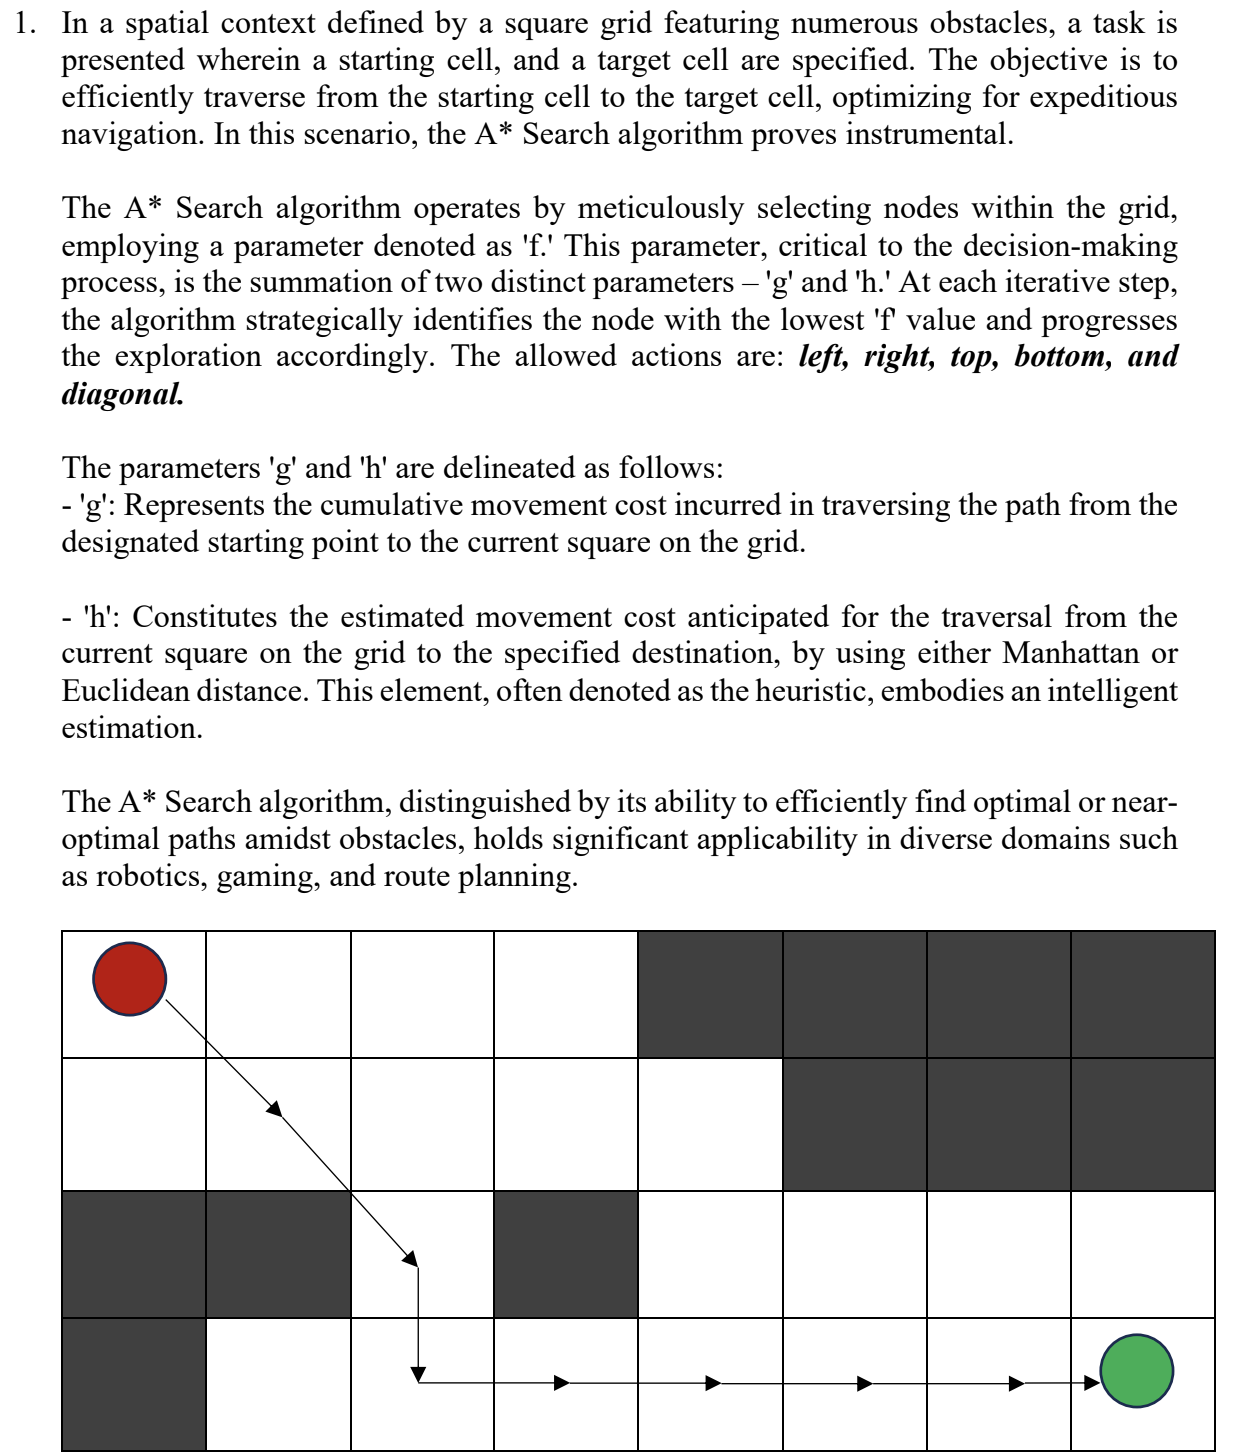

## Test 1

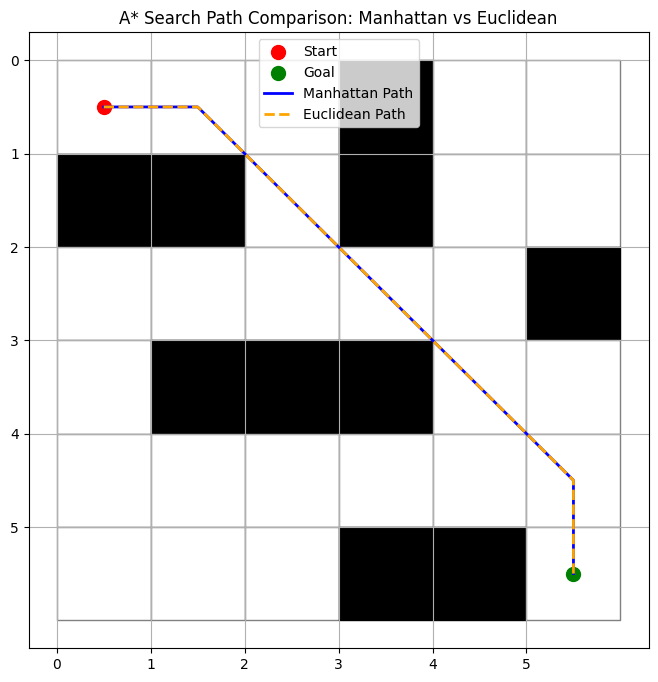

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappop, heappush
import math

# Define the grid (0 = free space, 1 = obstacle)
grid = np.array([
    [0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
])

# Define start and goal positions
start = (0, 0)
goal = (5, 5)

# Heuristic functions
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

# A* search implementation
def astar_search(grid, start, goal, heuristic):
    rows, cols = grid.shape
    open_set = []
    heappush(open_set, (0, start))  # (f-score, position)
    came_from = {}  # To reconstruct path
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

    while open_set:
        _, current = heappop(open_set)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No path found

# Run A* search with Manhattan and Euclidean heuristics
manhattan_path = astar_search(grid, start, goal, manhattan)
euclidean_path = astar_search(grid, start, goal, euclidean)

# Plot the grid and the paths
plt.figure(figsize=(8, 8))
for row in range(grid.shape[0]):
    for col in range(grid.shape[1]):
        if grid[row, col] == 1:
            plt.fill_between([col, col + 1], row, row + 1, color="black")
        else:
            plt.fill_between([col, col + 1], row, row + 1, color="white", edgecolor="gray")

# Plot start and goal
plt.scatter(start[1] + 0.5, start[0] + 0.5, color="red", s=100, label="Start")
plt.scatter(goal[1] + 0.5, goal[0] + 0.5, color="green", s=100, label="Goal")

# Plot the Manhattan path
if manhattan_path:
    path_x = [p[1] + 0.5 for p in manhattan_path]
    path_y = [p[0] + 0.5 for p in manhattan_path]
    plt.plot(path_x, path_y, color="blue", linewidth=2, label="Manhattan Path")

# Plot the Euclidean path
if euclidean_path:
    path_x = [p[1] + 0.5 for p in euclidean_path]
    path_y = [p[0] + 0.5 for p in euclidean_path]
    plt.plot(path_x, path_y, color="orange", linewidth=2, linestyle="--", label="Euclidean Path")

plt.gca().invert_yaxis()
plt.xticks(range(grid.shape[1]))
plt.yticks(range(grid.shape[0]))
plt.grid(True)
plt.legend()
plt.title("A* Search Path Comparison: Manhattan vs Euclidean")
plt.show()


##Test 2

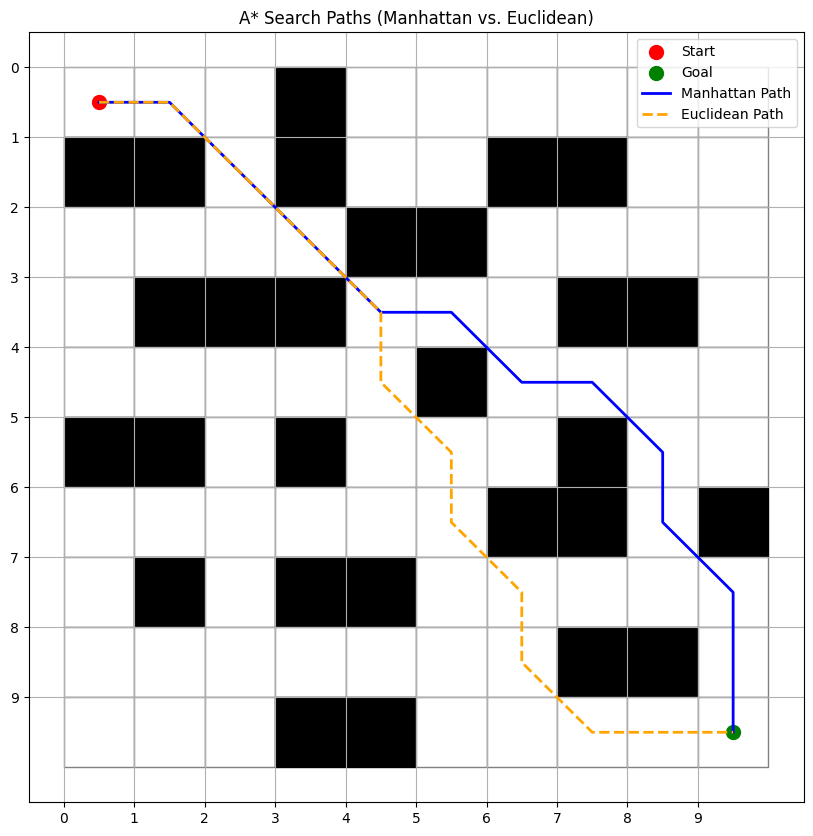

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappop, heappush

# Define the 10x10 grid (0 = free space, 1 = obstacle)
grid = np.array([
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
])

# Define start and goal positions
start = (0, 0)
goal = (9, 9)

# Heuristic functions
def manhattan_heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean_heuristic(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5

# A* search implementation
def astar_search(grid, start, goal, heuristic):
    rows, cols = grid.shape
    open_set = []
    heappush(open_set, (0, start))  # (f-score, position)
    came_from = {}  # To reconstruct path
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

    while open_set:
        _, current = heappop(open_set)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No path found

# Run A* search with Manhattan and Euclidean heuristics
path_manhattan = astar_search(grid, start, goal, manhattan_heuristic)
path_euclidean = astar_search(grid, start, goal, euclidean_heuristic)

# Plot the grid and the paths
plt.figure(figsize=(10, 10))
for row in range(grid.shape[0]):
    for col in range(grid.shape[1]):
        if grid[row, col] == 1:
            plt.fill_between([col, col + 1], row, row + 1, color="black")
        else:
            plt.fill_between([col, col + 1], row, row + 1, color="white", edgecolor="gray")

# Plot start and goal
plt.scatter(start[1] + 0.5, start[0] + 0.5, color="red", s=100, label="Start")
plt.scatter(goal[1] + 0.5, goal[0] + 0.5, color="green", s=100, label="Goal")

# Plot the paths
if path_manhattan:
    path_x = [p[1] + 0.5 for p in path_manhattan]
    path_y = [p[0] + 0.5 for p in path_manhattan]
    plt.plot(path_x, path_y, color="blue", linewidth=2, label="Manhattan Path")

if path_euclidean:
    path_x = [p[1] + 0.5 for p in path_euclidean]
    path_y = [p[0] + 0.5 for p in path_euclidean]
    plt.plot(path_x, path_y, color="orange", linestyle="--", linewidth=2, label="Euclidean Path")

plt.gca().invert_yaxis()
plt.xticks(range(grid.shape[1]))
plt.yticks(range(grid.shape[0]))
plt.grid(True)
plt.legend()
plt.title("A* Search Paths (Manhattan vs. Euclidean)")
plt.show()

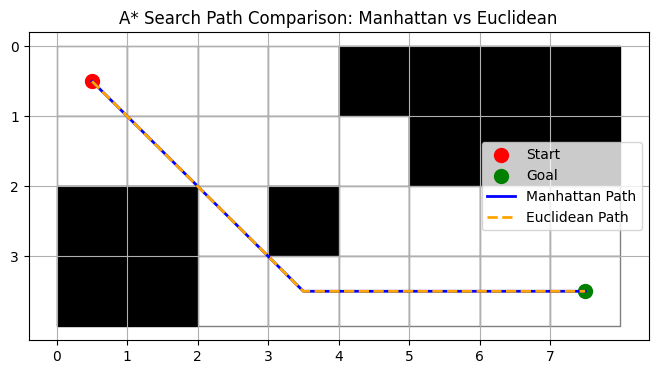

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappop, heappush
import math

# Define the grid (0 = free space, 1 = obstacle)
grid = np.array([
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0],
])

# Define start and goal positions
start = (0, 0)
goal = (3, 7)

# Heuristic functions
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

# A* search implementation
def astar_search(grid, start, goal, heuristic):
    rows, cols = grid.shape
    open_set = []
    heappush(open_set, (0, start))  # (f-score, position)
    came_from = {}  # To reconstruct path
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

    while open_set:
        _, current = heappop(open_set)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No path found

# Run A* search with Manhattan and Euclidean heuristics
manhattan_path = astar_search(grid, start, goal, manhattan)
euclidean_path = astar_search(grid, start, goal, euclidean)

# Plot the grid and the paths
plt.figure(figsize=(8, 4))
for row in range(grid.shape[0]):
    for col in range(grid.shape[1]):
        if grid[row, col] == 1:
            plt.fill_between([col, col + 1], row, row + 1, color="black")
        else:
            plt.fill_between([col, col + 1], row, row + 1, color="white", edgecolor="gray")

# Plot start and goal
plt.scatter(start[1] + 0.5, start[0] + 0.5, color="red", s=100, label="Start")
plt.scatter(goal[1] + 0.5, goal[0] + 0.5, color="green", s=100, label="Goal")

# Plot the Manhattan path
if manhattan_path:
    path_x = [p[1] + 0.5 for p in manhattan_path]
    path_y = [p[0] + 0.5 for p in manhattan_path]
    plt.plot(path_x, path_y, color="blue", linewidth=2, label="Manhattan Path")

# Plot the Euclidean path
if euclidean_path:
    path_x = [p[1] + 0.5 for p in euclidean_path]
    path_y = [p[0] + 0.5 for p in euclidean_path]
    plt.plot(path_x, path_y, color="orange", linewidth=2, linestyle="--", label="Euclidean Path")

plt.gca().invert_yaxis()
plt.xticks(range(grid.shape[1]))
plt.yticks(range(grid.shape[0]))
plt.grid(True)
plt.legend()
plt.title("A* Search Path Comparison: Manhattan vs Euclidean")
plt.show()


## **Question 2**

In a spatial context defined by a square matrix of order N * N, a rat is situated at the starting point (0,0), aiming to reach the destination at (N-1, N-1). The task at hand is to enumerate all feasible paths that the rat can undertake to traverse from the source to the destination. The permissible directions for the rat's movement are denoted as 'U' (up), 'D' (down), 'L' (left), and 'R' (right). Within this matrix, a cell assigned the value 0
signifies an obstruction, rendering it impassable for the rat, while a value of 1 indicates a traversable cell. The objective is to furnish a list of paths in lexicographically increasing order, with the constraint that no cell can be revisited along the path.
Moreover, if the source cell is assigned a value of 0, the rat is precluded from moving to any other cell.

To accomplish this, the AO* Search algorithm is employed to systematically explore the AND-OR graph and evaluate all conceivable paths from source to destination (with path cost = 1, and heuristic values given in the diagram). The algorithm dynamically adapts its heuristic function during the search, optimizing the exploration process. The resultant list of paths reflects a meticulous exploration of the matrix, ensuring
lexicographical order and adherence to the specified constraints.

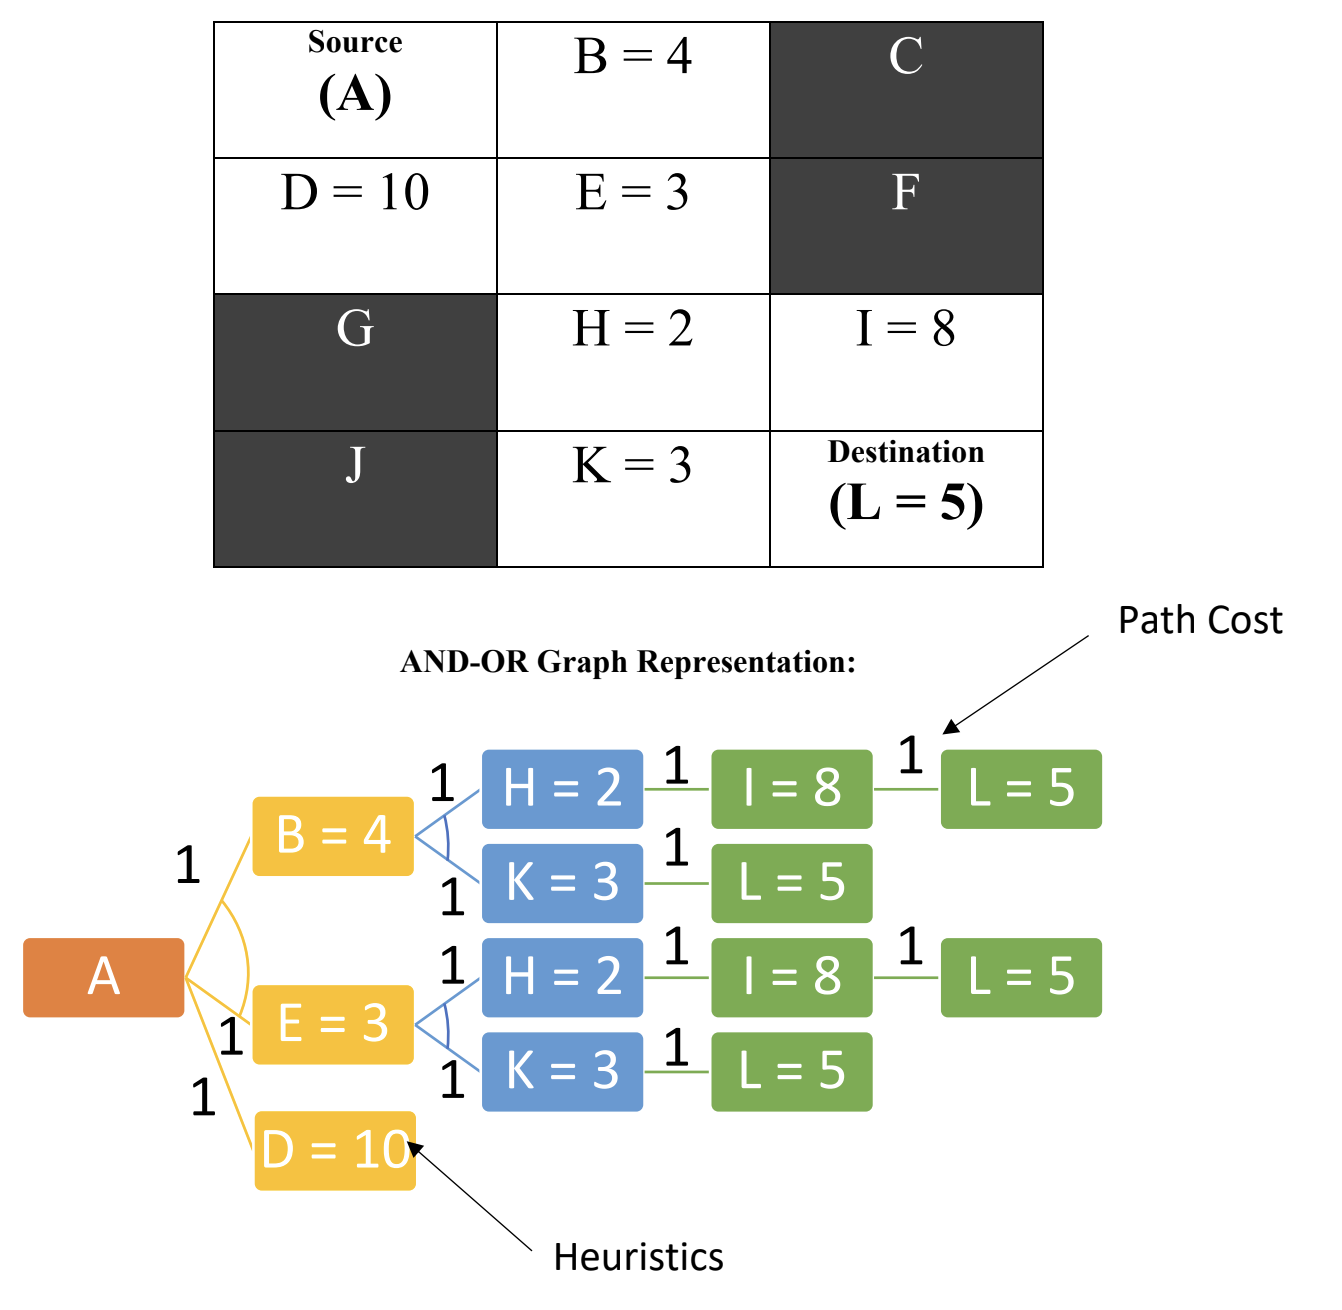


Found paths:
Path: RDDDRR
A -> B -> F -> J -> N -> O -> P


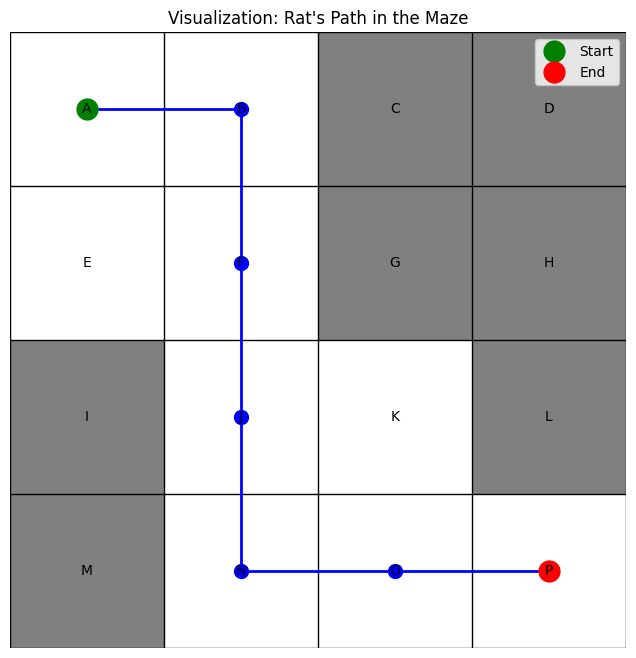

Path: RDDRDR
A -> B -> F -> J -> K -> O -> P


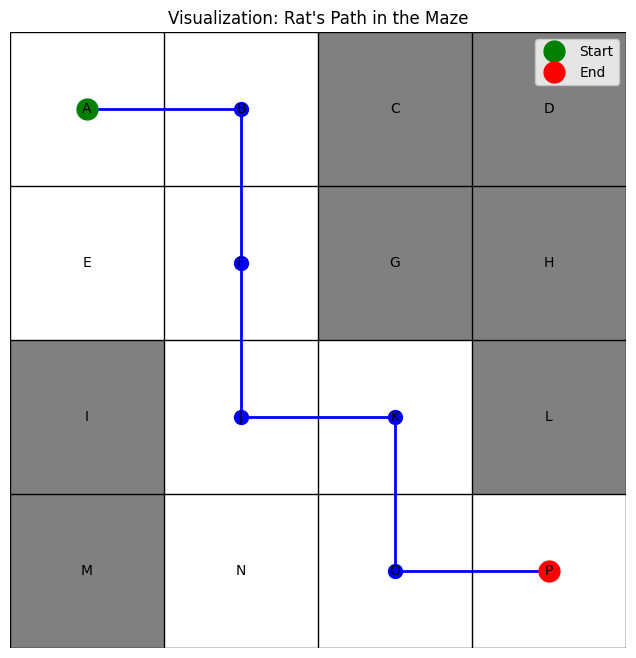

Path: DRDDRR
A -> E -> F -> J -> N -> O -> P


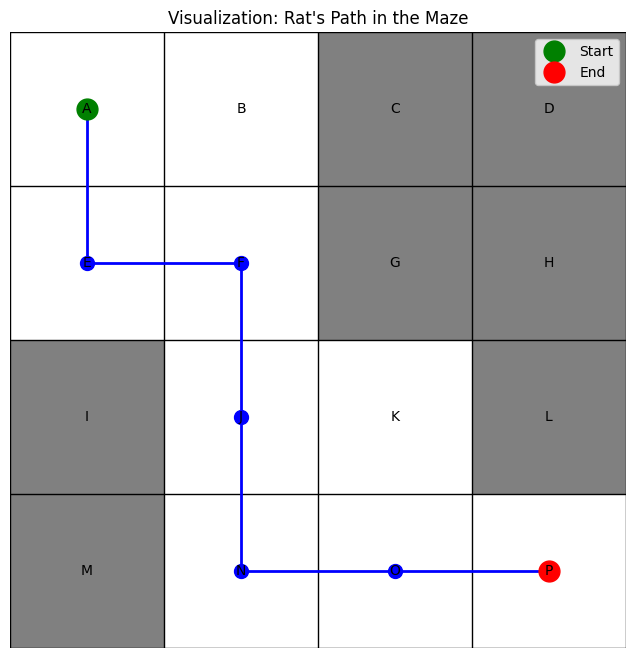

Path: DRDRDR
A -> E -> F -> J -> K -> O -> P


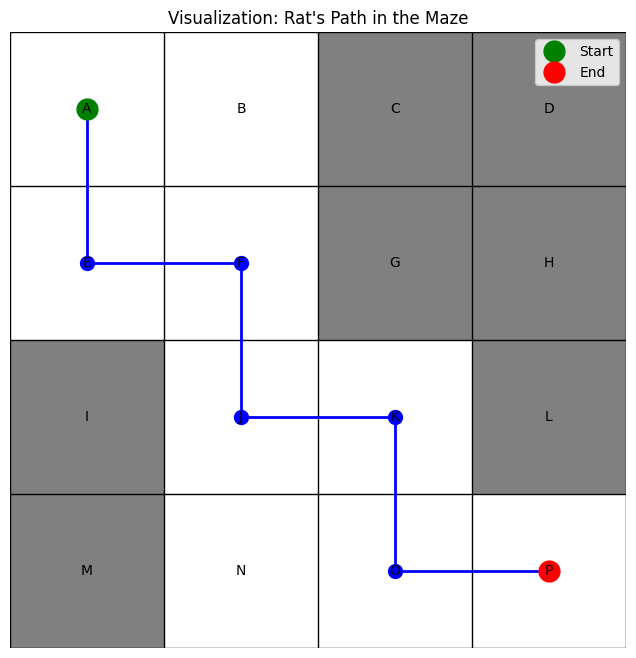

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import string
from typing import List, Tuple, Dict, Set

class MazeSolver:
    def __init__(self, maze: List[List[int]], weights: List[List[int]]):
        self.maze = np.array(maze)
        self.weights = np.array(weights)
        self.size = len(maze)
        self.cell_names = self._generate_cell_names()
        self._validate_weights()

    def _generate_cell_names(self) -> Dict[Tuple[int, int], str]:
        """Generate simple letter-based cell names (A, B, C, etc.)"""
        names = {}
        letter = iter(string.ascii_uppercase)
        for i in range(self.size):
            for j in range(self.size):
                names[(i, j)] = next(letter)
        return names

    def _validate_weights(self) -> None:
        """Ensure weight matrix is valid for the given maze"""
        invalid_cells = np.where((self.maze == 0) & (self.weights != 0))
        if len(invalid_cells[0]) > 0:
            pos = (invalid_cells[0][0], invalid_cells[1][0])
            raise ValueError(f"Invalid weight at position {pos}: blocked cell cannot have weight")

    def _is_safe_move(self, pos: Tuple[int, int], visited: Set[Tuple[int, int]]) -> bool:
        """Check if a position is valid and unvisited"""
        x, y = pos
        return (0 <= x < self.size and
                0 <= y < self.size and
                self.maze[x][y] == 1 and
                pos not in visited)

    def _find_all_paths(self, current: Tuple[int, int], target: Tuple[int, int],
                       path: List[str], visited: Set[Tuple[int, int]], all_paths: List[str]) -> None:
        """Recursively find all possible paths through the maze"""
        if current == target:
            all_paths.append(''.join(path))
            return

        visited.add(current)
        x, y = current

        moves = {
            'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)
        }

        weighted_moves = []
        for direction, (dx, dy) in moves.items():
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.size and 0 <= new_y < self.size:
                weighted_moves.append((self.weights[new_x][new_y], direction, (new_x, new_y)))

        weighted_moves.sort()

        for _, direction, new_pos in weighted_moves:
            if self._is_safe_move(new_pos, visited):
                path.append(direction)
                self._find_all_paths(new_pos, target, path, visited, all_paths)
                path.pop()

        visited.remove(current)

    def solve(self) -> List[str]:
        """Find all possible paths through the maze"""
        if self.maze[0][0] == 0 or self.maze[-1][-1] == 0:
            return []

        paths: List[str] = []
        self._find_all_paths((0, 0), (self.size-1, self.size-1), [], set(), paths)
        return paths

    def get_path_coordinates(self, path: str) -> List[Tuple[int, int]]:
        """Convert a path string to list of coordinates"""
        x, y = 0, 0
        coords = [(x, y)]

        for move in path:
            if move == 'U': x -= 1
            elif move == 'D': x += 1
            elif move == 'L': y -= 1
            elif move == 'R': y += 1
            coords.append((x, y))

        return coords

    def visualize_path(self, path: str) -> None:
        """Create a simple visualization of the maze and path"""
        plt.figure(figsize=(8, 8))

        # Plot maze (white paths, gray walls)
        plt.imshow(self.maze, cmap=plt.cm.colors.ListedColormap(['grey', 'white']))

        # Add grid
        for i in range(self.size + 1):
            plt.axhline(i - 0.5, color='black', linewidth=1)
            plt.axvline(i - 0.5, color='black', linewidth=1)

        # Plot path if provided
        if path:
            coords = self.get_path_coordinates(path)
            y_coords, x_coords = zip(*coords)
            plt.plot(x_coords, y_coords, 'b-o', linewidth=2, markersize=10)

        # Add start and end points
        plt.plot(0, 0, 'go', markersize=15, label='Start')
        plt.plot(self.size-1, self.size-1, 'ro', markersize=15, label='End')

        # Add cell labels
        for pos, name in self.cell_names.items():
            y, x = pos
            plt.text(x, y, name, ha='center', va='center')

        plt.title("Visualization: Rat's Path in the Maze")
        plt.legend()
        plt.axis('off')
        plt.grid(True)
        plt.show()

# Example usage
if __name__ == "__main__":
    maze = [
        [1, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 1, 1, 1]
    ]

    weights = [
        [0, 4, 0, 0],
        [10, 3, 0, 0],
        [0, 2, 8, 0],
        [0, 3, 5, 1]
    ]

    solver = MazeSolver(maze, weights)
    paths = solver.solve()

    print("\nFound paths:")
    for path in paths:
        print(f"Path: {path}")
        labeled_path = [solver.cell_names[coord] for coord in solver.get_path_coordinates(path)]
        print(" -> ".join(labeled_path))
        solver.visualize_path(path)


Found paths with costs:
Path: RDDDRR, Cost: 18
Path: RDDRDR, Cost: 23
Path: DRDDRR, Cost: 24
Path: DRDRDR, Cost: 29

Optimal Path: RDDDRR, Cost: 18


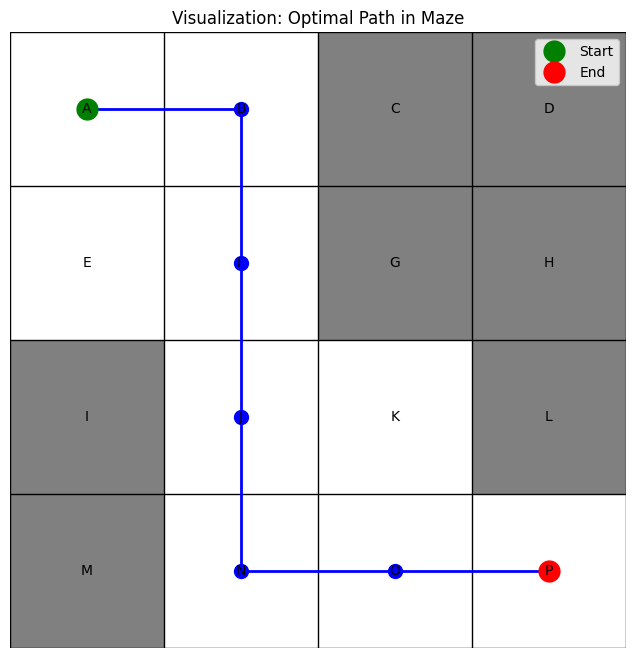

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import string
from typing import List, Tuple, Dict, Set

class MazeSolver:
    def __init__(self, maze: List[List[int]], weights: List[List[int]]):
        self.maze = np.array(maze)
        self.weights = np.array(weights)
        self.size = len(maze)
        self.cell_names = self._generate_cell_names()
        self._validate_weights()

    def _generate_cell_names(self) -> Dict[Tuple[int, int], str]:
        names = {}
        letter = iter(string.ascii_uppercase)
        for i in range(self.size):
            for j in range(self.size):
                names[(i, j)] = next(letter)
        return names

    def _validate_weights(self) -> None:
        invalid_cells = np.where((self.maze == 0) & (self.weights != 0))
        if len(invalid_cells[0]) > 0:
            pos = (invalid_cells[0][0], invalid_cells[1][0])
            raise ValueError(f"Invalid weight at position {pos}: blocked cell cannot have weight")

    def _is_safe_move(self, pos: Tuple[int, int], visited: Set[Tuple[int, int]]) -> bool:
        x, y = pos
        return (0 <= x < self.size and 0 <= y < self.size and self.maze[x][y] == 1 and pos not in visited)

    def _find_all_paths(self, current: Tuple[int, int], target: Tuple[int, int],
                        path: List[str], visited: Set[Tuple[int, int]], all_paths: List[Tuple[str, int]], cost: int) -> None:
        if current == target:
            all_paths.append((''.join(path), cost))
            return

        visited.add(current)
        x, y = current

        moves = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
        weighted_moves = []

        for direction, (dx, dy) in moves.items():
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.size and 0 <= new_y < self.size:
                weighted_moves.append((self.weights[new_x][new_y], direction, (new_x, new_y)))

        weighted_moves.sort()

        for weight, direction, new_pos in weighted_moves:
            if self._is_safe_move(new_pos, visited):
                path.append(direction)
                self._find_all_paths(new_pos, target, path, visited, all_paths, cost + weight)
                path.pop()

        visited.remove(current)

    def solve(self) -> List[Tuple[str, int]]:
        if self.maze[0][0] == 0 or self.maze[-1][-1] == 0:
            return []

        paths: List[Tuple[str, int]] = []
        self._find_all_paths((0, 0), (self.size-1, self.size-1), [], set(), paths, self.weights[0][0])
        return paths

    def visualize_path(self, path: str) -> None:
        plt.figure(figsize=(8, 8))
        plt.imshow(self.maze, cmap=plt.cm.colors.ListedColormap(['grey', 'white']))
        for i in range(self.size + 1):
            plt.axhline(i - 0.5, color='black', linewidth=1)
            plt.axvline(i - 0.5, color='black', linewidth=1)

        coords = self.get_path_coordinates(path)
        if coords:
            y_coords, x_coords = zip(*coords)
            plt.plot(x_coords, y_coords, 'b-o', linewidth=2, markersize=10)

        plt.plot(0, 0, 'go', markersize=15, label='Start')
        plt.plot(self.size-1, self.size-1, 'ro', markersize=15, label='End')

        for pos, name in self.cell_names.items():
            y, x = pos
            plt.text(x, y, name, ha='center', va='center')

        plt.title("Visualization: Optimal Path in Maze")
        plt.legend()
        plt.axis('off')
        plt.grid(True)
        plt.show()

    def get_path_coordinates(self, path: str) -> List[Tuple[int, int]]:
        x, y = 0, 0
        coords = [(x, y)]
        for move in path:
            if move == 'U': x -= 1
            elif move == 'D': x += 1
            elif move == 'L': y -= 1
            elif move == 'R': y += 1
            coords.append((x, y))
        return coords

# Example usage
if __name__ == "__main__":
    maze = [
        [1, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 1, 1, 1]
    ]

    weights = [
        [0, 4, 0, 0],
        [10, 3, 0, 0],
        [0, 2, 8, 0],
        [0, 3, 5, 1]
    ]

    solver = MazeSolver(maze, weights)
    paths = solver.solve()

    print("\nFound paths with costs:")
    for path, cost in paths:
        print(f"Path: {path}, Cost: {cost}")

    if paths:
        optimal_path, optimal_cost = min(paths, key=lambda x: x[1])
        print(f"\nOptimal Path: {optimal_path}, Cost: {optimal_cost}")
        solver.visualize_path(optimal_path)
